In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset (2).zip to Dataset (2).zip


In [ ]:
import os
import zipfile
os.makedirs('/content/Database', exist_ok=True)
zip_path = 'Dataset.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref :
  zip_ref.extractall('/content/Database')
print(os.listdir('/content/Database'))

['Validation', 'Train', 'Test']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import top_k_accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
imgDataGen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 25,
    zoom_range = 0.2,
)

trainDataGen = imgDataGen.flow_from_directory('/content/Database/Train', target_size = (160, 160), batch_size = 32, class_mode = 'binary')

valDataGen = imgDataGen.flow_from_directory('/content/Database/Validation', target_size = (160, 160), batch_size = 32, class_mode = 'binary')

testDataGen = imgDataGen.flow_from_directory('/content/Database/Test', target_size = (160, 160), batch_size = 32, class_mode = 'binary')

Found 15000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
sample = Sequential()

sample.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(160,160,3)))
sample.add(BatchNormalization())
sample.add(MaxPooling2D(pool_size=(2,2)))

sample.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(160,160,3)))
sample.add(BatchNormalization())
sample.add(MaxPooling2D(pool_size=(2,2)))

sample.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(160,160,3)))
sample.add(BatchNormalization())
sample.add(MaxPooling2D(pool_size=(2,2)))

sample.add(Flatten())

sample.add(Dense(128, activation='relu'))
sample.add(Dropout(0.2))
sample.add(Dense(64, activation='relu'))
sample.add(Dropout(0.2))
sample.add(Dense(1, activation='sigmoid'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
sample.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = sample.fit(trainDataGen, epochs=25, validation_data=valDataGen)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 246ms/step - accuracy: 0.6081 - loss: 1.5053 - val_accuracy: 0.7460 - val_loss: 0.5164
Epoch 2/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 129s 234ms/step - accuracy: 0.7749 - loss: 0.4866 - val_accuracy: 0.7085 - val_loss: 0.5871
Epoch 3/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 247ms/step - accuracy: 0.8226 - loss: 0.4123 - val_accuracy: 0.8725 - val_loss: 0.3218
Epoch 4/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 249ms/step - accuracy: 0.8512 - loss: 0.3572 - val_accuracy: 0.8050 - val_loss: 0.4313
Epoch 5/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 226ms/step - accuracy: 0.8627 - loss: 0.3247 - val_accuracy: 0.8670 - val_loss: 0.3381
Epoch 6/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 118s 247ms/step - accuracy: 0.8741 - loss: 0.3040 - val_accuracy: 0.8450 - val_loss: 0.3779
Epoch 7/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 248ms/step - accuracy: 0.8956 - loss: 0.2591 - val_accuracy: 0.8420 - val_loss: 0.3718
Epoch 8/25
469/469 ━━━━━━━━━━━━━━━━━━━━ 108s 229ms/step - accuracy: 0.9044 - loss: 0.23

In [ ]:
test_loss, test_acc = sample.evaluate(testDataGen)
print(f'Accuracy : {test_acc*100}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 209ms/step - accuracy: 0.5127 - loss: 0.6932
Accuracy : 50.050002336502075


In [ ]:
sample.save('/content/Database/sample.h5')

In [ ]:
from tensorflow.keras.models import load_model
sample = load_model('/content/Database/sample.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


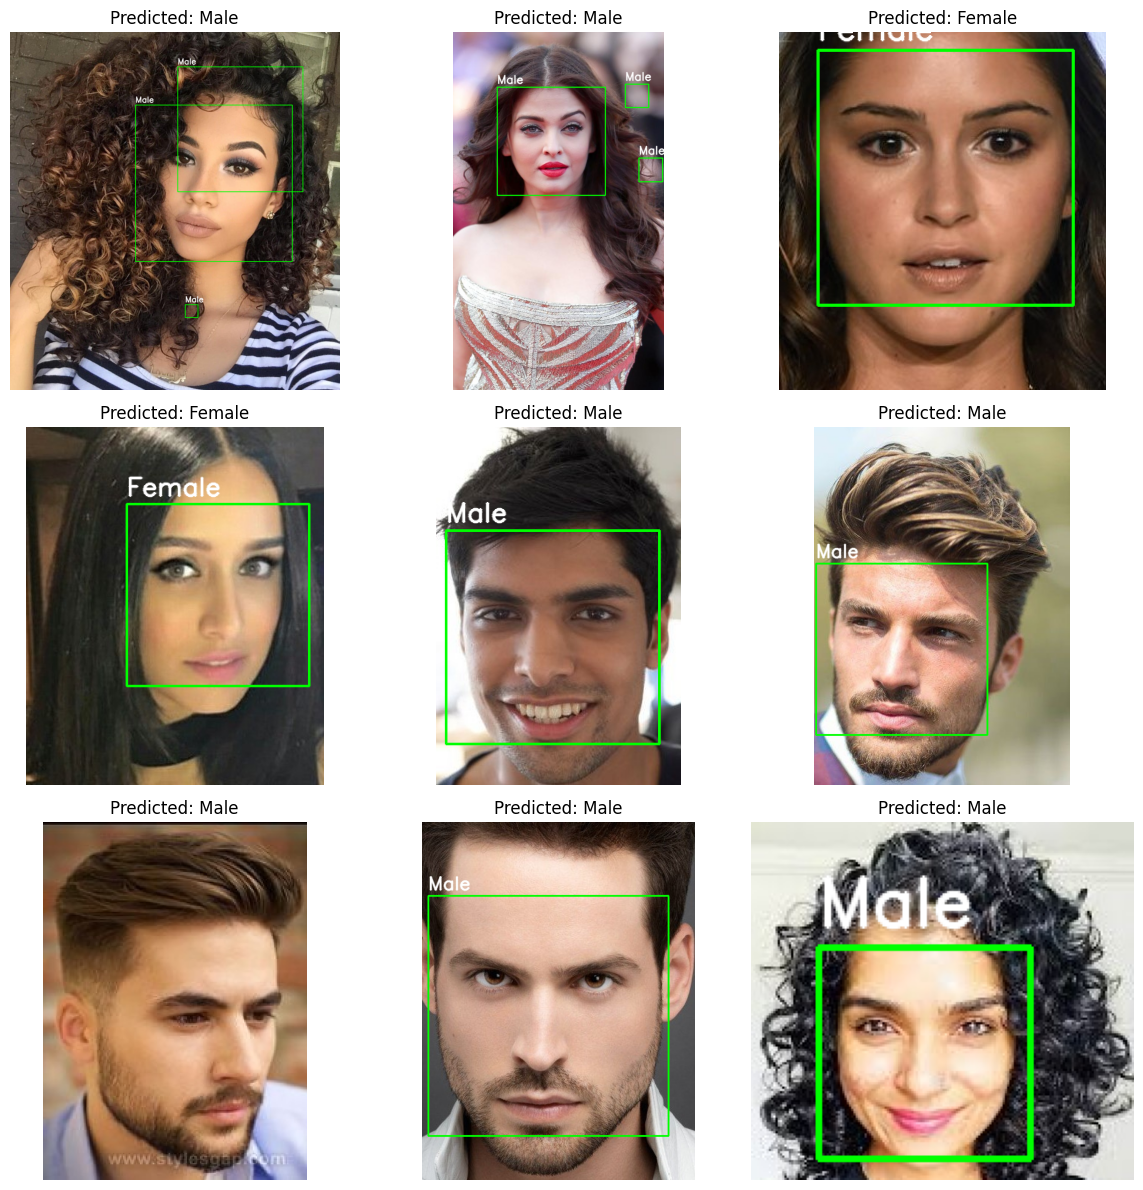

In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the pre-trained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Preprocess image with OpenCV and detect faces
def preprocess_and_detect_face(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    # Convert to grayscale for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)  # Detect faces with scaleFactor and minNeighbors

    return img_rgb, faces

# List all image files in the Input Dataset folder
image_files = [os.path.join('/content/drive/MyDrive/Colab Notebooks/Input Dataset (1)', file) for file in os.listdir('/content/drive/MyDrive/Colab Notebooks/Input Dataset (1)') if file.endswith(('png', 'jpg', 'jpeg'))]

# Perform predictions and visualize results
plt.figure(figsize=(12, 12))
for i, (image_file, gender) in enumerate(results[:9]):  # Show first 9 images
    plt.subplot(3, 3, i + 1)

    # Get image and faces
    img_rgb, faces = preprocess_and_detect_face(os.path.join('/content/drive/MyDrive/Colab Notebooks/Input Dataset (1)', image_file))

    for (x, y, w, h) in faces:
        # Draw a square around the face
        img_rgb = cv2.rectangle(img_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green color for the square

        # Place the predicted gender label above the face
        font = cv2.FONT_HERSHEY_SIMPLEX
        label_position = (x, y - 10)  # Position for the label (just above the face)
        img_rgb = cv2.putText(img_rgb, gender, label_position, font, 1, (255, 255, 255), 2, cv2.LINE_AA)  # White color for the label

    # Display the image with bounding box and gender label
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {gender}")
    plt.axis('off')

plt.tight_layout()
plt.show()